## Implementation the dual gradient method for COMPAS and Adult Credit

In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

from responsibly.dataset import build_FICO_dataset
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
import tikzplotlib as tpl


unable to import 'smart_open.gcs', disabling that module


In [2]:
data = build_FICO_dataset()
cdf = data["cdf"]
rocs = data["rocs"]
print(cdf)

        Asian   Black  Hispanic   White
Score                                  
0.0    0.0000  0.0007    0.0001  0.0001
0.5    0.0013  0.0119    0.0047  0.0026
1.0    0.0088  0.0533    0.0222  0.0116
1.5    0.0107  0.0647    0.0274  0.0143
2.0    0.0132  0.0789    0.0349  0.0180
...       ...     ...       ...     ...
98.0   0.9894  0.9989    0.9966  0.9894
98.5   0.9961  0.9995    0.9988  0.9962
99.0   0.9989  0.9999    0.9998  0.9991
99.5   0.9994  1.0000    1.0000  0.9998
100.0  1.0000  1.0000    1.0000  1.0000

[198 rows x 4 columns]


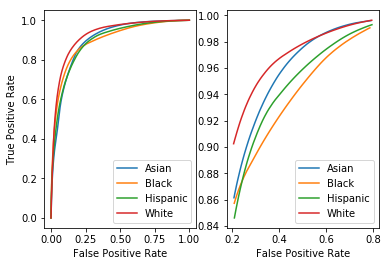

In [6]:
#figure = plt.figure(figsize=(15, 10), dpi=80)
figure, axs = plt.subplots(1, 2)
# figure.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

legend = []
for key, item in rocs.items():
    axs[0].plot(item[0], item[1])

    tmp_x = item[0][item[0] > 0.2]
    tmp_y = item[1][item[0] > 0.2]

    tmp_y = tmp_y[tmp_x < 0.8]
    tmp_x = tmp_x[tmp_x < 0.8]

    axs[1].plot(tmp_x, tmp_y)
    legend.append(key)

axs[0].legend(legend, loc='lower right')
axs[1].legend(legend, loc='lower right')
axs[0].set_ylabel("True Positive Rate")
axs[0].set_xlabel("False Positive Rate")
axs[1].set_xlabel("False Positive Rate")

tpl.save("fico_roc.tex",
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.5cm"})

In [ ]:
figure = plt.figure(figsize=(15, 10), dpi=80)

plt.plot(cdf)
plt.legend(cdf.columns, loc='lower right')
plt.xlabel("Score")
plt.ylabel("Probability")
tpl.save("fico_cdf.tex",
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.')